In [1]:
import cv2
import os, zipfile
from gluoncv import utils
import mxnet as mx
import numpy as np
from matplotlib import pyplot as plt

im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/datasets/dog.jpg?raw=true',
                          path='dog.jpg')
img = mx.image.imread(im_fname)
ax = utils.viz.plot_image(img)
print(img.shape)
plt.show()

(576, 768, 3)


<Figure size 640x480 with 1 Axes>

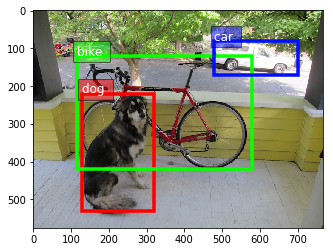

In [2]:
dog_label = [130, 220, 320, 530]
bike_label = [115, 120, 580, 420]
car_label = [480, 80, 700, 170]
all_boxes = np.array([dog_label, bike_label, car_label])
all_ids = np.array([0, 1, 2])
class_names = ['dog', 'bike', 'car']

ax = utils.viz.plot_bbox(img, all_boxes, labels=all_ids, class_names=class_names)
plt.show()

In [3]:
def write_line(img_path, im_shape, boxes, ids, idx):
    h, w, c = im_shape
    # for header, we use minimal length 2, plus width and height
    # with A: 4, B: 5, C: width, D: height
    A = 4
    B = 5
    C = w
    D = h
    # concat id and bboxes
    labels = np.hstack((ids.reshape(-1, 1), boxes)).astype('float')
    # normalized bboxes (recommanded)
    labels[:, (1, 3)] /= float(w)
    labels[:, (2, 4)] /= float(h)
    # flatten
    labels = labels.flatten().tolist()
    str_idx = [str(idx)]
    str_header = [str(x) for x in [A, B, C, D]]
    str_labels = [str(x) for x in labels]
    str_path = [img_path]
    line = '\t'.join(str_idx + str_header + str_labels + str_path) + '\n'
    return line

In [9]:
with open('./data/train.lst', 'w') as f:
    line = write_line('10010/10010/dog.jpg', img.shape, all_boxes, all_ids, 0)
    f.write(line)

In [12]:
from gluoncv.data import LstDetection
lst_dataset = LstDetection('train.lst', root=os.path.expanduser('./data/'))
print('length: ', len(lst_dataset))
first_img = lst_dataset[0]
print('image shape:', first_img.shape)
print('label example: ')
print(lst_dataset[0][1])

FileNotFoundError: [Errno 2] No such file or directory: 'train.lst'

In [8]:
import sys
import subprocess
im2rec = utils.download('https://raw.githubusercontent.com/apache/incubator-mxnet/' +
                        '6843914f642c8343aaa9a09db803b6af6f5d94a2/tools/im2rec.py', 'im2rec.py')
subprocess.check_output([sys.executable, 'im2rec.py', 'val', '.', '--no-shuffle', '--pass-through', '--pack-label'])

100%|██████████| 4/4 [00:00<00:00, 583.47KB/s]


b'Did not find and list file with prefix /home/zhangkai/code/mxnet_object_detection/val\n'